# Project by Varun Gehlot




## Objective:

### To identify the probable cause of Breast Cancer, Renel Cancer, Colon Cancer, Lung Cancer and Prostrate Cancer in terms of genes responsible for each cancer type. 
### Leading us to early identification of each type of cancer reducing the fatality rate.


In [3]:
import numpy as np
import pandas as pd

#### Loading the Dataset


In [4]:
df = pd.read_csv("data.csv")
label_df = pd.read_csv("labels.csv")

## Exploratory Data Analysis

In [5]:
df.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [6]:
df.shape

(801, 20532)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Columns: 20532 entries, Unnamed: 0 to gene_20530
dtypes: float64(20531), object(1)
memory usage: 125.5+ MB


In [8]:
label_df.head()

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA


In [9]:
label_df.shape

(801, 2)

In [10]:
label_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  801 non-null    object
 1   Class       801 non-null    object
dtypes: object(2)
memory usage: 12.6+ KB


In [11]:
label_df['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [12]:
df_1 =  pd.merge(df,label_df, on=['Unnamed: 0'])
df_1.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [13]:
df_1.shape

(801, 20533)

In [14]:
df_1['Class'].value_counts()

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Class, dtype: int64

In [15]:
df_1.drop('Unnamed: 0', axis = 1,inplace=True)

In [16]:
df_1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [17]:
agg_data =pd.pivot_table(data= df_1, index = 'Class', aggfunc='mean')

In [18]:
agg_data

,gene_0,gene_1,gene_10,gene_100,gene_1000,gene_10000,gene_10001,gene_10002,gene_10003,gene_10004,...,gene_9990,gene_9991,gene_9992,gene_9993,gene_9994,gene_9995,gene_9996,gene_9997,gene_9998,gene_9999
Class,,,,,,,,,,,,,,,,,,,,,
BRCA,0.011362,2.839739,0.544066,10.681488,10.303568,3.258028,7.339461,7.900497,7.489146,7.508378,...,1.969278,5.142237,1.736160,2.312551,1.696127,2.493789,0.046527,2.099709,0.151063,6.954733
COAD,0.022212,3.438381,0.357278,11.015745,9.951124,3.462039,5.526673,7.487396,3.783493,6.959238,...,2.216178,0.354828,1.833606,1.619692,3.839205,2.396207,0.090327,2.298246,0.065007,6.618466
KIRC,0.046544,2.398129,1.166824,10.238999,11.148094,1.651798,6.895752,7.686932,7.269611,7.636246,...,1.824964,0.596508,2.393303,1.872888,1.289448,3.139623,0.130416,2.387948,0.148641,6.429343
LUAD,0.041088,3.358260,0.607541,10.517670,10.503698,3.754181,7.281878,7.041924,6.145042,7.148682,...,2.609490,2.801700,2.738326,1.869805,2.217144,2.459608,0.042070,2.281828,0.056608,6.721517
PRAD,0.026544,3.441041,0.765608,10.282936,9.967433,1.949878,7.946141,8.529695,5.696368,7.396572,...,1.623491,4.594215,1.684084,2.588050,1.703772,3.568490,0.572893,3.621548,0.094953,7.104225


In [19]:
agg_data.shape

(5, 20531)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
tr_df = agg_data.T
tr_df.head()

Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_0,0.011362,0.022212,0.046544,0.041088,0.026544
gene_1,2.839739,3.438381,2.398129,3.358260,3.441041
gene_10,0.544066,0.357278,1.166824,0.607541,0.765608
gene_100,10.681488,11.015745,10.238999,10.517670,10.282936
gene_1000,10.303568,9.951124,11.148094,10.503698,9.967433


In [22]:
tr_df.shape

(20531, 5)

F:\Anaconda\lib\site-packages\seaborn\matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


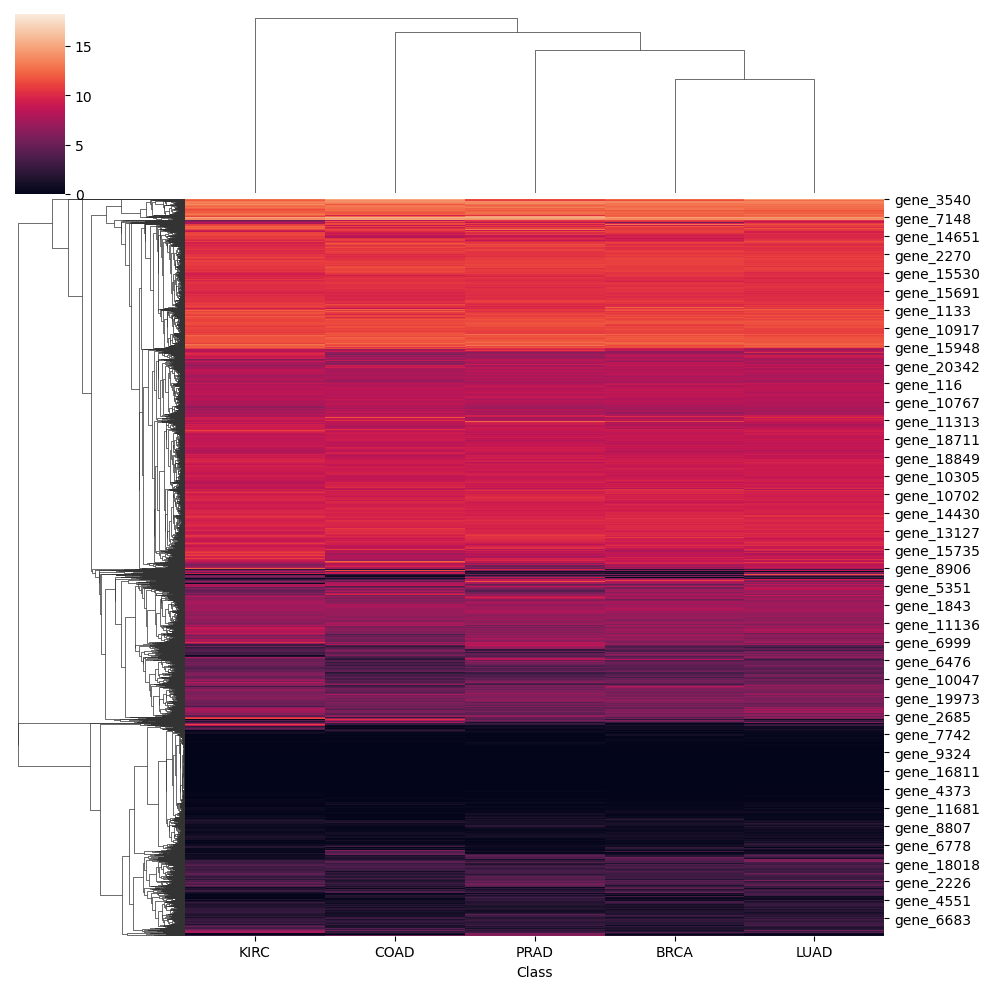

In [23]:
sns.clustermap(tr_df)

In [24]:
tr_df

Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_0,0.011362,0.022212,0.046544,0.041088,0.026544
gene_1,2.839739,3.438381,2.398129,3.358260,3.441041
gene_10,0.544066,0.357278,1.166824,0.607541,0.765608
gene_100,10.681488,11.015745,10.238999,10.517670,10.282936
gene_1000,10.303568,9.951124,11.148094,10.503698,9.967433
...,...,...,...,...,...
gene_9995,2.493789,2.396207,3.139623,2.459608,3.568490
gene_9996,0.046527,0.090327,0.130416,0.042070,0.572893
gene_9997,2.099709,2.298246,2.387948,2.281828,3.621548
gene_9998,0.151063,0.065007,0.148641,0.056608,0.094953


In [25]:
popul_mean_BRCA = tr_df['BRCA'].mean()

In [26]:
popul_mean_COAD = tr_df['COAD'].mean()

In [27]:
popul_mean_KIRC = tr_df['KIRC'].mean()

In [28]:
popul_mean_LUAD = tr_df['LUAD'].mean() 

In [29]:
popul_mean_PRAD = tr_df['PRAD'].mean()

In [30]:
tr_df_sampled = tr_df.sample(n = 200)
tr_df_sampled

Class,BRCA,COAD,KIRC,LUAD,PRAD
gene_212,8.191377,9.322849,8.473490,8.520590,8.811184
gene_5246,6.070574,5.552432,5.892936,5.605171,6.250860
gene_525,11.329820,11.072090,10.976806,11.039549,11.544546
gene_12494,0.001618,0.006289,0.122659,0.000000,0.027925
gene_15897,2.899252,4.308109,0.950528,13.639469,9.619839
...,...,...,...,...,...
gene_15792,10.610957,11.744283,14.652469,13.415587,8.647777
gene_14645,10.523550,9.657407,9.848016,10.905916,9.864242
gene_6531,2.406728,2.969983,0.732681,2.153959,2.159942
gene_9353,0.049286,0.000000,0.071032,0.064875,0.064964


In [31]:
tr_df_sampled.shape

(200, 5)

In [32]:
samp_mean_BRCA = tr_df_sampled['BRCA'].mean()

In [33]:
samp_mean_COAD = tr_df_sampled['COAD'].mean()

In [34]:
samp_mean_KIRC = tr_df_sampled['KIRC'].mean()

In [35]:
samp_mean_LUAD = tr_df_sampled['LUAD'].mean() 

In [36]:
samp_mean_PRAD = tr_df_sampled['PRAD'].mean()

In [37]:
from scipy.stats import ttest_1samp

In [38]:
tr_df_sampled['BRCA']

gene_212       8.191377
gene_5246      6.070574
gene_525      11.329820
gene_12494     0.001618
gene_15897     2.899252
                ...    
gene_15792    10.610957
gene_14645    10.523550
gene_6531      2.406728
gene_9353      0.049286
gene_5707     11.127975
Name: BRCA, Length: 200, dtype: float64

In [39]:
# checking if BRCA cancer types belong to the population or not 

In [40]:
t_stat1,p_val1=ttest_1samp(tr_df_sampled['BRCA'],popul_mean_BRCA)

In [41]:
p_val1

0.6952712275819097

In [42]:
t_stat2,p_val2=ttest_1samp(tr_df_sampled['COAD'],popul_mean_COAD)

In [43]:
p_val2

0.698356732056427

In [44]:
t_stat3,p_val3=ttest_1samp(tr_df_sampled['KIRC'],popul_mean_KIRC)

In [45]:
p_val3

0.9333540262428285

In [46]:
t_stat4,p_val4=ttest_1samp(tr_df_sampled['LUAD'],popul_mean_LUAD)

In [47]:
p_val4

0.9732880823773677

In [48]:
t_stat5,p_val5=ttest_1samp(tr_df_sampled['PRAD'],popul_mean_PRAD)

In [49]:
p_val5

0.9246696633572932

## Dimensionality Reduction

##### pca

In [50]:
df_1.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530,Class
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0,PRAD
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0,LUAD
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0,PRAD
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0,PRAD
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0,BRCA


In [51]:
# dividing the data into X(independent) and Y (dependent var)


X = df_1.drop('Class',axis = 1)
X.head()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [52]:
y = df_1['Class']

In [53]:
y.head()

0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
Name: Class, dtype: object

In [54]:
y.unique()

array(['PRAD', 'LUAD', 'BRCA', 'KIRC', 'COAD'], dtype=object)

In [55]:
# in the model, converting the values to categorical

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [56]:
# fitting and transforming the values for y

y = le.fit_transform(y)

In [57]:
# 0-BRCA  4- PRAD

y[:5] 

array([4, 3, 4, 4, 0])

In [58]:
# scaling the features for X

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc

StandardScaler()

In [59]:
X = sc.fit_transform(X)

In [60]:
X[:5]

array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       [-0.19479935,  0.54388843,  1.32618236, ...,  0.16617359,
        -1.07894144, -0.26190144],
       [-0.19479935, -0.29595452, -0.25710728, ..., -0.22987755,
        -0.20158849, -0.26190144]])

In [61]:
X.shape

(801, 20531)

In [62]:
# PCA class

from sklearn.decomposition import PCA

pca = PCA()
pca

PCA()

In [63]:
pca_model = pca.fit_transform(X)

In [64]:
pca_model.shape

(801, 801)

In [65]:
pd.DataFrame(pca_model).to_csv('PCA_model_columns.csv')

##### Linear Discriminant Analysis

In [66]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

In [67]:
# applying LDA on X

lda_X = lda.fit_transform(X,y) 

In [68]:
lda_X.shape # dimn reduced from 20 k to 4

(801, 4)

##### T-SNE( t distributed stochastic neighbouring entities)


In [69]:

from sklearn.manifold import TSNE

tsne = TSNE(verbose=True, random_state= 1 )

In [70]:
# applying this class on X

tsne_model = tsne.fit_transform(X)

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 801 samples in 0.023s...
[t-SNE] Computed neighbors for 801 samples in 0.222s...
[t-SNE] Computed conditional probabilities for sample 801 / 801
[t-SNE] Mean sigma: 40.641029
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.292488
[t-SNE] KL divergence after 1000 iterations: 0.827223


In [71]:
tsne_model.shape # from 4 to 2 after t-sne

(801, 2)

In [72]:
pd.DataFrame(tsne_model).to_csv('tsne_model.csv')

## Clustering Genes and Samples

In [73]:
kmeans_data=pd.DataFrame(tsne_model)
kmeans_data.head()

,0,1
0,4.364812,27.364166
1,15.797206,-3.433955
2,12.052662,38.397358
3,14.622668,35.073730
4,-15.710217,4.416759


In [74]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters= 5)

In [75]:
kmeans_model.fit(kmeans_data)

KMeans(n_clusters=5)

In [76]:
kmeans_model.labels_

array([2, 1, 2, 2, 3, 2, 0, 2, 3, 2, 3, 0, 2, 3, 3, 3, 1, 0, 0, 2, 3, 0,
       1, 3, 0, 1, 4, 3, 3, 3, 3, 3, 0, 3, 2, 3, 0, 1, 3, 3, 0, 2, 2, 0,
       0, 3, 2, 4, 3, 1, 3, 1, 3, 2, 4, 3, 3, 4, 0, 3, 1, 0, 3, 1, 2, 4,
       3, 2, 0, 3, 0, 3, 3, 1, 3, 1, 3, 0, 2, 4, 3, 2, 3, 3, 2, 2, 3, 3,
       0, 3, 2, 2, 3, 3, 3, 2, 4, 3, 2, 3, 3, 0, 3, 0, 1, 0, 1, 4, 1, 1,
       2, 3, 1, 2, 3, 0, 0, 0, 3, 3, 1, 0, 1, 3, 2, 2, 2, 3, 0, 1, 4, 3,
       4, 3, 3, 0, 1, 3, 0, 4, 3, 2, 3, 0, 1, 4, 2, 3, 1, 1, 1, 1, 3, 3,
       1, 3, 3, 2, 2, 1, 2, 1, 0, 3, 2, 1, 4, 0, 1, 3, 0, 1, 3, 1, 3, 3,
       3, 2, 3, 0, 4, 0, 3, 2, 2, 2, 1, 1, 3, 4, 1, 0, 1, 2, 1, 3, 3, 3,
       1, 1, 3, 0, 0, 0, 0, 2, 3, 2, 3, 1, 1, 3, 2, 3, 2, 3, 3, 3, 1, 3,
       0, 1, 0, 0, 1, 3, 0, 2, 3, 1, 1, 2, 4, 3, 0, 2, 0, 4, 3, 0, 0, 1,
       2, 2, 1, 1, 0, 3, 3, 4, 3, 2, 4, 3, 2, 0, 2, 2, 2, 3, 4, 4, 1, 4,
       4, 2, 1, 3, 3, 0, 0, 3, 4, 2, 0, 2, 3, 3, 0, 3, 3, 3, 3, 1, 1, 3,
       3, 3, 0, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 2, 3,

In [77]:
kmeans_model.labels_.shape

(801,)

In [78]:
kmeans_data['clus_no'] = kmeans_model.labels_ 

In [79]:
kmeans_data

,0,1,clus_no
0,4.364812,27.364166,2
1,15.797206,-3.433955,1
2,12.052662,38.397358,2
3,14.622668,35.073730,2
4,-15.710217,4.416759,3
...,...,...,...
796,-14.938532,8.140863,3
797,9.174356,-0.517968,1
798,22.201982,-13.317844,4
799,7.012878,31.732162,2


In [80]:
kmeans_data.columns

Index([0, 1, 'clus_no'], dtype='object')

In [81]:
kmeans_data.rename({0: 'Column1', 1: 'Column2'}, axis = 1, inplace = True)

In [82]:
kmeans_data

,Column1,Column2,clus_no
0,4.364812,27.364166,2
1,15.797206,-3.433955,1
2,12.052662,38.397358,2
3,14.622668,35.073730,2
4,-15.710217,4.416759,3
...,...,...,...
796,-14.938532,8.140863,3
797,9.174356,-0.517968,1
798,22.201982,-13.317844,4
799,7.012878,31.732162,2


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


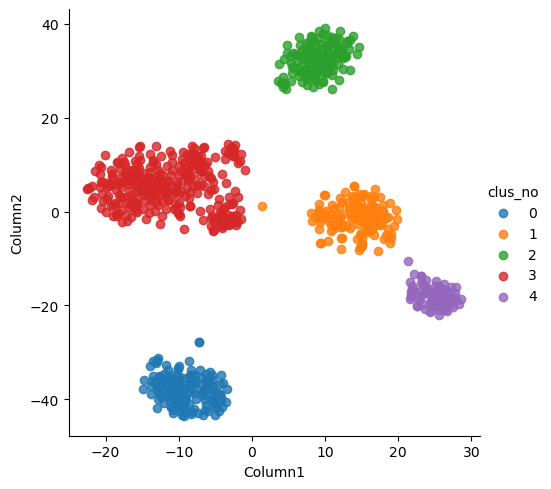

In [83]:
# ploting using sns

sns.lmplot("Column1", "Column2", data= kmeans_data, fit_reg=False, hue= 'clus_no')

In [84]:
# hieraechical clustering on X

hier_data = pd.DataFrame(tsne_model)
hier_data.head()

,0,1
0,4.364812,27.364166
1,15.797206,-3.433955
2,12.052662,38.397358
3,14.622668,35.073730
4,-15.710217,4.416759


In [85]:
from sklearn.cluster import AgglomerativeClustering

hier_cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward', affinity='euclidean')

In [86]:
#fitting model on X

hier_cluster_model.fit(hier_data)

AgglomerativeClustering(n_clusters=5)

In [87]:
hier_cluster_model.labels_

array([3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 0, 0, 2, 1, 1, 3, 0, 1,
       2, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 1, 3, 3, 1,
       1, 0, 3, 4, 0, 2, 0, 2, 0, 3, 4, 0, 0, 4, 1, 0, 2, 1, 0, 2, 3, 4,
       0, 3, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 3, 4, 0, 3, 0, 0, 3, 3, 0, 0,
       1, 0, 3, 3, 0, 0, 0, 3, 4, 0, 3, 0, 0, 1, 0, 1, 2, 1, 2, 4, 2, 2,
       3, 0, 2, 3, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 1, 0, 4, 0,
       4, 0, 0, 1, 2, 0, 1, 4, 0, 3, 0, 1, 2, 4, 3, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 4, 1, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 3, 0, 1, 4, 1, 0, 3, 3, 3, 2, 2, 0, 4, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 3, 0, 2, 2, 3, 4, 0, 1, 3, 1, 4, 0, 1, 1, 2,
       3, 3, 2, 2, 1, 0, 0, 4, 0, 3, 4, 0, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4,
       4, 3, 2, 0, 0, 1, 1, 0, 4, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0,

In [88]:
hier_data['clus_no']= hier_cluster_model.labels_

In [89]:
hier_data.head()

,0,1,clus_no
0,4.364812,27.364166,3
1,15.797206,-3.433955,2
2,12.052662,38.397358,3
3,14.622668,35.073730,3
4,-15.710217,4.416759,0


In [90]:
hier_data.rename({0: 'Column1', 1: 'Column2'}, axis=1, inplace=True)
hier_data

,Column1,Column2,clus_no
0,4.364812,27.364166,3
1,15.797206,-3.433955,2
2,12.052662,38.397358,3
3,14.622668,35.073730,3
4,-15.710217,4.416759,0
...,...,...,...
796,-14.938532,8.140863,0
797,9.174356,-0.517968,2
798,22.201982,-13.317844,4
799,7.012878,31.732162,3


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


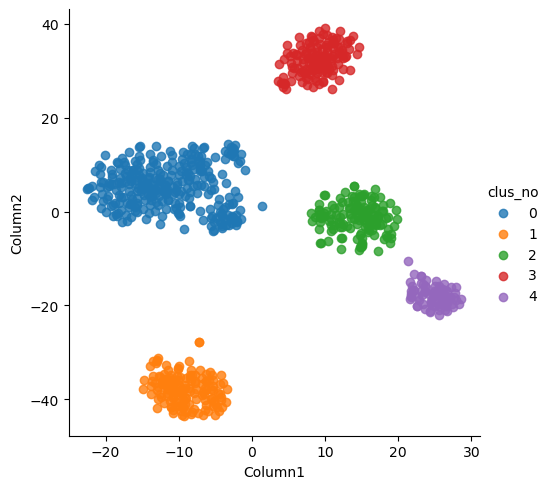

In [91]:
sns.lmplot("Column1", "Column2", data= hier_data, fit_reg=False, hue= 'clus_no')

In [92]:
# mean shift clustering - points are pushed towards the mode

In [93]:
tsne_model

array([[  4.3648124,  27.364166 ],
       [ 15.797206 ,  -3.433955 ],
       [ 12.052662 ,  38.397358 ],
       ...,
       [ 22.201982 , -13.317844 ],
       [  7.012878 ,  31.732162 ],
       [ 12.510225 ,  30.41438  ]], dtype=float32)

In [94]:
ms_data = pd.DataFrame(tsne_model)
ms_data

,0,1
0,4.364812,27.364166
1,15.797206,-3.433955
2,12.052662,38.397358
3,14.622668,35.073730
4,-15.710217,4.416759
...,...,...
796,-14.938532,8.140863
797,9.174356,-0.517968
798,22.201982,-13.317844
799,7.012878,31.732162


In [95]:
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

In [96]:
ms_X = MeanShift(bandwidth=10)

In [97]:
ms_X.fit(ms_data)

MeanShift(bandwidth=10)

In [98]:
ms_X.labels_

array([3, 2, 3, 3, 0, 3, 1, 3, 0, 3, 0, 1, 3, 0, 0, 0, 2, 1, 1, 3, 0, 1,
       2, 0, 1, 2, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 2, 0, 0, 1, 3, 3, 1,
       1, 0, 3, 4, 0, 2, 0, 2, 0, 3, 4, 0, 0, 4, 1, 0, 2, 1, 0, 2, 3, 4,
       0, 3, 1, 0, 1, 0, 0, 2, 0, 2, 0, 1, 3, 4, 0, 3, 0, 0, 3, 3, 0, 0,
       1, 0, 3, 3, 0, 0, 0, 3, 4, 0, 3, 0, 0, 1, 0, 1, 2, 1, 2, 4, 2, 2,
       3, 0, 2, 3, 0, 1, 1, 1, 0, 0, 2, 1, 2, 0, 3, 3, 3, 0, 1, 2, 4, 0,
       4, 0, 0, 1, 2, 0, 1, 4, 0, 3, 0, 1, 2, 4, 3, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 0, 3, 3, 2, 3, 2, 1, 0, 3, 2, 4, 1, 2, 0, 1, 2, 0, 2, 0, 0,
       0, 3, 0, 1, 4, 1, 0, 3, 3, 3, 2, 2, 0, 4, 2, 1, 2, 3, 2, 0, 0, 0,
       2, 2, 0, 1, 1, 1, 1, 3, 0, 3, 0, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0,
       1, 2, 1, 1, 2, 0, 1, 3, 0, 2, 2, 3, 4, 0, 1, 3, 1, 4, 0, 1, 1, 2,
       3, 3, 2, 2, 1, 0, 0, 4, 0, 3, 4, 0, 3, 1, 3, 3, 3, 0, 4, 4, 2, 4,
       4, 3, 2, 0, 0, 1, 1, 0, 4, 3, 1, 3, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 2, 3, 0,

In [99]:
ms_data['clus_no'] = ms_X.labels_
ms_data.head()

,0,1,clus_no
0,4.364812,27.364166,3
1,15.797206,-3.433955,2
2,12.052662,38.397358,3
3,14.622668,35.073730,3
4,-15.710217,4.416759,0


In [100]:
ms_data.rename({0 : 'column1', 1: 'column2'},axis = 1, inplace = True)

In [101]:
ms_data.head()

,column1,column2,clus_no
0,4.364812,27.364166,3
1,15.797206,-3.433955,2
2,12.052662,38.397358,3
3,14.622668,35.073730,3
4,-15.710217,4.416759,0


In [102]:
#mean shift clustering visualization

In [103]:
import seaborn as sns

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


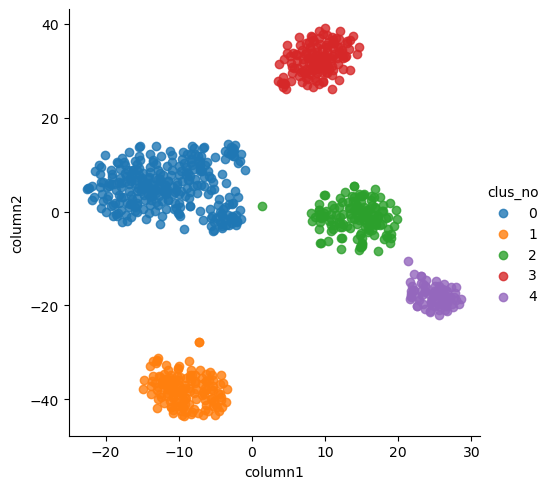

In [104]:
sns.lmplot('column1','column2', data=ms_data, fit_reg=False, hue = 'clus_no')

In [105]:
ms_data_y = pd.DataFrame(y)

In [106]:
ms_data_y.rename({0 : 'actual_class'}, axis = 1, inplace=True)

In [107]:
ms_data_y.head()

,actual_class
0,4
1,3
2,4
3,4
4,0


In [108]:
ms_y = MeanShift(bandwidth=10)

In [109]:
ms_y.fit(ms_data_y)

MeanShift(bandwidth=10)

In [110]:
ms_y.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
ms_data_y['clus_label'] = ms_y.labels_

In [112]:
ms_data_y.head()

,actual_class,clus_label
0,4,0
1,3,0
2,4,0
3,4,0
4,0,0


In [113]:
ms_data_y.index

RangeIndex(start=0, stop=801, step=1)

In [114]:
ms_data_y['index_col'] = ms_data_y.index
ms_data_y

,actual_class,clus_label,index_col
0,4,0,0
1,3,0,1
2,4,0,2
3,4,0,3
4,0,0,4
...,...,...,...
796,0,0,796
797,3,0,797
798,1,0,798
799,4,0,799


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


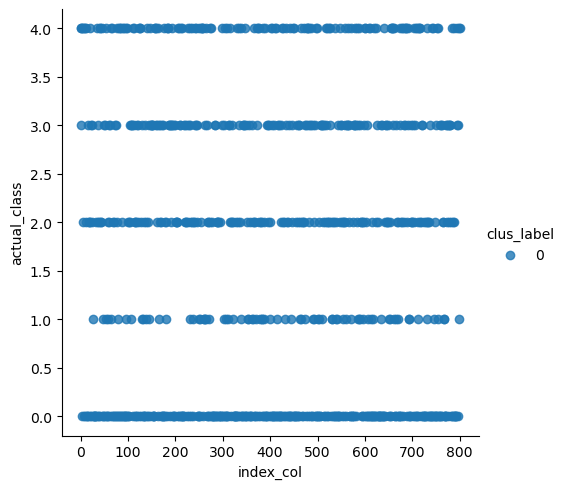

In [115]:
sns.lmplot('index_col','actual_class', data= ms_data_y,hue ='clus_label', fit_reg=False)

## Building Classification Model(s) with Feature Selection

##### Building classification model

In [116]:
df

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [117]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [118]:
# independent variable shape
df.shape

(801, 20531)

In [119]:
# dependent variable shape
y.shape

(801,)

In [120]:
from sklearn.model_selection import train_test_split

X_train_svm,X_test_svm,y_train,y_test = train_test_split(df,y,test_size=0.3)

In [121]:
X_train_svm.shape

(560, 20531)

In [122]:
X_test_svm.shape

(241, 20531)

In [123]:
y_train.shape

(560,)

In [124]:
y_test.size

241

##### Support Vector Machines

In [125]:
from sklearn.svm import SVC

In [126]:
model_svc = SVC()

In [127]:
model_svc.fit(X_train_svm,y_train)

SVC()

In [128]:
y_pred = model_svc.predict(X_test_svm)

In [129]:
y_pred

array([0, 0, 3, 3, 0, 2, 4, 2, 4, 4, 2, 0, 3, 4, 0, 2, 0, 0, 2, 3, 0, 3,
       0, 0, 0, 2, 1, 0, 3, 3, 0, 3, 0, 0, 1, 2, 3, 1, 0, 3, 0, 3, 2, 3,
       1, 2, 2, 4, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 1, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 3, 4, 0, 3, 0, 4, 0, 0, 4, 4, 2, 4, 4, 2, 3, 3,
       2, 3, 1, 1, 0, 0, 0, 3, 0, 0, 3, 0, 1, 2, 3, 2, 3, 0, 2, 0, 4, 4,
       4, 4, 2, 0, 3, 4, 0, 4, 0, 2, 1, 2, 0, 0, 0, 3, 4, 2, 2, 3, 1, 0,
       0, 2, 0, 4, 0, 0, 0, 4, 1, 3, 4, 3, 2, 2, 4, 0, 3, 2, 4, 0, 1, 1,
       4, 2, 0, 0, 0, 3, 1, 2, 1, 0, 0, 2, 0, 4, 2, 3, 2, 0, 4, 0, 0, 0,
       4, 1, 0, 0, 0, 0, 2, 3, 3, 0, 1, 1, 0, 0, 0, 3, 3, 2, 0, 0, 4, 0,
       0, 4, 0, 2, 3, 0, 4, 0, 0, 4, 0, 2, 0, 1, 0, 1, 4, 0, 0, 3, 2, 1,
       0, 3, 0, 2, 3, 1, 1, 1, 2, 0, 0, 1, 4, 3, 2, 3, 3, 0, 0, 0, 1])

In [130]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [131]:
accuracy_score(y_test, y_pred)

0.995850622406639

In [132]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      0.96      0.98        28
           2       1.00      1.00      1.00        44
           3       0.98      1.00      0.99        40
           4       1.00      1.00      1.00        33

    accuracy                           1.00       241
   macro avg       1.00      0.99      0.99       241
weighted avg       1.00      1.00      1.00       241



In [133]:
# ROC code

In [134]:
from sklearn.metrics import roc_auc_score
model_roc_svm = SVC(probability=True)

In [135]:
model_roc_svm.fit(X_train_svm,y_train)

SVC(probability=True)

In [136]:
y_test_pred = model_roc_svm.predict_proba(X_test_svm)

In [137]:
y_test_pred

array([[9.92936519e-01, 1.36583710e-03, 1.51769327e-03, 2.62166041e-03,
        1.55829015e-03],
       [9.81762973e-01, 2.18493021e-03, 2.36786841e-03, 8.46249183e-03,
        5.22173629e-03],
       [1.63879603e-02, 1.18806416e-01, 1.69579628e-02, 8.38013499e-01,
        9.83416152e-03],
       ...,
       [9.93344349e-01, 8.64664033e-04, 1.56029651e-03, 1.81567934e-03,
        2.41501078e-03],
       [9.93057892e-01, 8.34318334e-04, 1.57681359e-03, 2.21803842e-03,
        2.31293727e-03],
       [9.37979987e-03, 9.66059717e-01, 5.23487717e-03, 1.24471211e-02,
        6.87848488e-03]])

In [138]:
# roc_auc_score
roc_auc_score(y_test,y_test_pred,multi_class='ovr')

1.0

##### Classification using Random Forest

In [139]:
X_train_rf,X_test_rf,y_train_rf,y_test_rf = train_test_split(df,y,test_size=0.3)

In [140]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [141]:
# pred on fit data using the fitted model
y_test_pred_rf = model_rf.predict(X_test_rf)


In [142]:
accuracy_score(y_test_rf,y_test_pred_rf)

0.995850622406639

In [143]:

y_train_pred_rf = model_rf.predict(X_train_rf)

In [144]:
accuracy_score(y_train_rf,y_train_pred_rf)

1.0

In [145]:
print(classification_report(y_train_rf,y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00        56
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00        89
           4       1.00      1.00      1.00        93

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



In [146]:
print(classification_report(y_test_rf,y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99        81
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        43
           3       1.00      0.98      0.99        52
           4       1.00      1.00      1.00        43

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241



In [147]:
# roc_auc_score

rf_model_roc = RandomForestClassifier()

In [148]:
rf_model_roc.fit(X_train_rf,y_train_rf)

RandomForestClassifier()

In [149]:
y_test_pred_roc = rf_model_roc.predict_proba(X_test_rf)

In [150]:
roc_auc_score(y_test_rf,y_test_pred_roc,multi_class='ovr')*100

99.99642178808845

##### Neural Networks


In [151]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [152]:
X_train_nn,X_test_nn,y_train_nn,y_test_nn = train_test_split(df,y,test_size=0.3)

In [153]:
X_train_nn.shape

(560, 20531)

In [154]:
X_test_nn.shape

(241, 20531)

In [155]:
y_train_nn.shape

(560,)

In [156]:
y_test_nn.shape

(241,)

In [157]:
model_nn_org = Sequential()

In [158]:
model_nn_org.add(tf.keras.layers.BatchNormalization(input_shape = (20531,)))

In [159]:
model_nn_org.add(tf.keras.layers.Dense(20531))

In [160]:
y_train_nn = tf.keras.utils.to_categorical(y_train_nn,5)

In [161]:
y_test_nn = tf.keras.utils.to_categorical(y_test_nn,5)

In [162]:
y

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

In [163]:
# first hidden layer
model_nn_org.add(tf.keras.layers.Dense(1000,activation='tanh'))
model_nn_org.add(tf.keras.layers.BatchNormalization())
model_nn_org.add(tf.keras.layers.Dropout(0.03))
tf.random.set_seed(0)

In [164]:
# second hidden layer
model_nn_org.add(tf.keras.layers.Dense(500))
model_nn_org.add(tf.keras.layers.LeakyReLU())
model_nn_org.add(tf.keras.layers.BatchNormalization())
model_nn_org.add(tf.keras.layers.Dropout(0.01))
tf.random.set_seed(0)

In [165]:
# third hidden layer

model_nn_org.add(tf.keras.layers.Dense(250,activation='softmax'))

In [166]:
# output layer

model_nn_org.add(tf.keras.layers.Dense(5))

In [167]:
# compiling the model

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_nn_org.compile(optimizer=optimizer, loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
model_nn_org.fit(X_train_nn,y_train_nn, epochs = 10, batch_size = 1000, validation_data= (X_test_nn,y_test_nn))